# <center> Machine Learning for Marketing Project 2: Marketing Campaign 

## Project 2 - Classification 
### Predict customers likely to respond to a marketing campaign
#### This notebook uses the *campaign.xlsx* dataset. 
##### This notebook includes `'Business Understanding'`, `'Data Understanding'` and `'Feature Exploration'` phases. Based on the feedbacks `'Data Preperation'`, `'Modeling'` and `'Evaluation'` parts place in the different notebook. 

### Dataset description

| Feature               | Description                                                    |
|-----------------------|----------------------------------------------------------------|
| AcceptedCmp1          | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2          | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3          | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4          | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5          | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response (target)     | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| Complain              | 1 if customer complained in the last 2 years                   |
| DtCustomer            | Date of customer’s enrolment with the company                  |
| Education             | Customer’s level of education                                  |
| Marital               | Customer’s marital status                                      |
| Kidhome               | Number of small children in customer’s household               |
| Teenhome              | Number of teenagers in customer’s household                    |
| Income                | Customer’s yearly household income                             |
| MntFishProducts       | Amount spent on fish products in the last 2 years              |
| MntMeatProducts       | Amount spent on meat products in the last 2 years              |
| MntFruits             | Amount spent on fruits products in the last 2 years            |
| MntSweetProducts      | Amount spent on sweet products in the last 2 years             |
| MntWines              | Amount spent on wine products in the last 2 years              |
| MntGoldProds          | Amount spent on gold products in the last 2 years              |
| NumDealsPurchases     | Number of purchases made with discount                         |
| NumCatalogPurchases   | Number of purchases made using catalogue                       |
| NumStorePurchases     | Number of purchases made directly in stores                    |
| NumWebPurchases       | Number of purchases made through company’s web site            |
| NumWebVisitsMonth     | Number of visits to company’s web site in the last month       |
| Recency               | Number of days since the last purchase                         |

## **1. BUSINESS UNDERSTANDING**

### **Overview**
<p>It is asked to develop a prediction model in such a way that it will be possible for the Marketing Department of a retail company to predict which customers are likely to respond to a marketing campaing based on information from a previous campaign.</p>
<p>A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses.</p>

### **What is needed for the model to be considered successfull ?** 
Product manager Sarah striving to optimize the company marketing campaigns. With a keen eye on metrics like recall(>0.75) and F1 score, Sarah ensures their campaigns reach a broad audience (recall) while maintaining precision in targeting (F1 score > 0.5). 

### **Model building**

To achieve the objective, it is followed a systematic approach, CRISP-DM, that involves several stages and proceed to train and evaluate predictive models using 4 different machine learning models with their best parameters such as:

- Decision Tree 
- Random Forest 
- XGBoost
- Logistic Regression

It is tried to explore various models from different families, including bagging techniques like Random Forest, boosting methods such as XGBoost, as well as Logistic Regression which is linear model. **Logistic Regression is selected as a best model.**

### **Questions or additional informations**
For any additional questions, don't hesitate to get in touch with the instructors. The instructors will also act as the company business/project stakeholder.

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import re
import collections
from datetime import datetime

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Set seaborn style
sns.set_style("whitegrid")

# Set the max_columns option to None to display all columns
pd.set_option('display.max_columns', None)

#### **Helper functions**

In [2]:
# Helper function 1
# CROSSTAB PLOT - RELATION BETWEEN CATEGORICAL VARIABLES AND RESPONSE
# WHY? This function is valuable for exploratory data analysis and understanding the patterns and distributions within categorical variables in the context of a output variable.

def plot_crosstab(data, column1, column2):
    """
    Create a crosstab and plot it.

    Parameters:
    - data: DataFrame, the dataset containing the data.
    - column1: str, the name of the first column for crosstab.
    - column2: str, the name of the second column(Response) for crosstab.

    Returns:
    - None
    """
    # Create crosstab
    crosstab_df = pd.crosstab(data[column1], data[column2])
    
    # Plot
    crosstab_df.plot(kind='bar', figsize=(4, 3))

    # Set the title and y label
    plt.title(f'{column2} by {column1}', size=9)
    plt.ylabel('Frequency')

    # Rename the response in legend
    plt.legend(["Not Accepted", "Accepted"], fontsize=8)

    # Proportions
    column1_counts = data[column1].value_counts()
    total_count = column1_counts.sum()

    # Print
    print("Probability of occurrence:")
    print('\n'.join([f"{category}: {count/total_count:.2%}" for category, count in column1_counts.items()]))
    plt.show()

In [3]:
# Helper function 2
# Base code adapted from: Prof. Nuno Antonio, Data Science for Marketing. Plus, it is turned into def function and added labels.
# DENSITY PLOT - RELATION BETWEEN CONTINUOUS VARIABLES AND RESPONSE
# WHY? When investigating the relationship between a continuous predictor variables and a binary output variable, it helps identifying patterns, understanding distributions, and gaining insights into the association between variables.

def density_plot(data, column_name):
    """
    Plot density plot of response by a specific column.

    Parameters:
    - data: DataFrame, the dataset containing the data.
    - column_name: str, the name of the column to plot.

    Returns:
    - None
    """
    # Draw
    fig, ax = plt.subplots(figsize=(4, 3))
    sns.kdeplot(data=data.loc[data['Response'] == 1, column_name], color='blue', ax=ax, label='Accepted')
    sns.kdeplot(data=data.loc[data['Response'] == 0, column_name], color='orange', ax=ax, label='Not Accepted')

    # Decoration
    sns.despine()
    plt.title(f"Density plot - Response by {column_name}", fontsize=9)
    plt.xlabel(column_name)
    plt.ylabel("Kernel Density Estimate")
    plt.rc('axes', labelsize=10)
    plt.legend(fontsize=8)
    plt.show()

#### **Load the data**

In [4]:
# Load the excel file
ds = pd.read_excel('campaign.xlsx', engine='openpyxl')

#### **Dataset first look**

In [5]:
# Show first-last 5 rows
ds

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635.0,88.0,546,172,88,88.0,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11.0,1.0,6,2,1,6.0,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426.0,49.0,127,111,21,42.0,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11.0,4.0,20,10,3,5.0,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173.0,43.0,118,46,27,15.0,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709.0,43.0,182,42,118,247.0,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406.0,0.0,30,0,0,8.0,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908.0,48.0,217,32,12,24.0,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428.0,30.0,214,80,30,61.0,2,6,5,10,3,0,0,0,0,0,0,3,11,0


- What catches the eye at the first glance is that `Z_CostContact` and `Z_Revenue` columns in the dataset. Most likely, these columns contain identical values for all rows. This will become apperant upon inspecting the unique values for each column. Other than this, dataset looks good to go.

#### **Check the number of entries and data types for columns**

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2237 non-null   float64
 10  MntFruits            2238 non-null   float64
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2187 non-null   float64
 15  NumDealsPurchases    2240 non-null   i

Let's check the number of entries, columns with their counts and their data types. This will give us a fundamental understanding of the data. 
- Dataset has 2240 rows, 28 features and 1 target(`Response`) column. 
- Column `ID` that does not provide any predictive value, will be dropped.
- There are missing values in `Income`, `MntWines`, `MntFruits`, `MntGoldProds`.
- `Dt_Customer` dtype will be reformatted to proper format, datetime. 

#### **Reformat the `Dt_Customer` dtype to datetime**

In [7]:
# Reformat
ds['Dt_Customer'] = pd.to_datetime(ds['Dt_Customer'])

# Confirm
print(ds['Dt_Customer'].dtype)

datetime64[ns]


By reformating the `Dt_Customer` successfully, it is aimed to make the values more usable and interpretable for analysis. So far so good, we can move on to data understanding phase.

## **2. DATA UNDERSTANDING**

#### **Summary Statistics**

In [8]:
# By default, describe() function computes summary statistics for numerical columns  
# Included categorical variables with 'all' and transpose 'T' to display columns vertically for readability
ds.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ID,2240.0,NaN,NaN,NaN,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,NaN,NaN,NaN,2013-07-19 17:05:21.428571392,2012-07-30 00:00:00,2013-01-16 18:00:00,2013-07-09 00:00:00,2013-12-31 00:00:00,2042-11-09 00:00:00,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2237.0,NaN,NaN,NaN,303.838623,0.0,24.0,173.0,504.0,1493.0,336.576209


#### **Why?** 

Summary statistics give us a comprehensive analysis including both numerical and categorical variables, and their respective summary statistics. For numerical values, we can examine the count of values, mean, minimum, quartiles, maximum, and standard deviation. Additionally, for categorical columns, we can identify the most frequent values.

#### **Findings**:
- The most common education level: **Graduation**.
- The most frequent marital status: **Married**. 
- The **average income**: $52,247, **minimum income**: $1,730 and **maximum**: $666,666. 
- The **average recency**: 49 days **minimum recency**: 0 and **maximum**: 99 days. 
- We can observe that 25% of the `Income` column values falls below $35,303 or, the values in the `Recency` column tend to deviate from the mean by about ±28.96 days, giving us an idea of how spread out the values are from the average.

With statistics and one line of code we can make a lot of observations. 

#### **Duplicate check**

In [9]:
# Print duplicates
print(f'Number of duplicated rows in the dataset: {ds.duplicated().sum()}')

Number of duplicated rows in the dataset: 0


In [10]:
# Check whether ID's are unique
ds['ID'].duplicated().sum()

0

Great! We don't have duplicated rows and each ID is unique.

#### **Unique values for each column**

In [11]:
# Check whether there is junk or meaningless values in columns
col = ds.columns

for cols in col:
    unique_values = ds[cols].unique()
    print(f"Unique values in {cols}: {unique_values}") # Click text editor(VScode) below to check all unique values

Unique values in ID: [5524 2174 4141 ... 7270 8235 9405]
Unique values in Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Unique values in Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values in Income: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Unique values in Kidhome: [0 1 2]
Unique values in Teenhome: [0 1 2]
Unique values in Dt_Customer: <DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 

#### **Why?** 
Checking uniques values for each columns help us the detect data errors, junk or meaningless values. By that, we can improve the overall quality of the data. 

#### **Findings**:
- Here we go! Our assumption in the beginning was correct. `Z_CostContact` and `Z_Revenue` columns have only one value which is 3 and 11 respectively. Since they don't provide a pattern for our prediction, columns will be dropped.
- There are data errors in `Dt_Customer` ('2042-11-09', '2041-02-25') and `MntSweetProducts` (2342344, 23423444, 234444) columns. These values are not logical based on the data at hand. They will be removed or imputed. Decision will be taken after analysis. 

#### **Missing values**

In [13]:
# Print the count of missing values and percentage for each column
count = ds.isnull().sum().sort_values(ascending=False)
percentage = ((ds.isnull().sum()/len(ds)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys = ['Count', 'Percentage'])

print('Count and percantage of missing values for the columns:')

missing_data

Count and percantage of missing values for the columns:


,Count,Percentage
MntGoldProds,53,2.366071
Income,24,1.071429
MntWines,3,0.133929
MntFruits,2,0.089286
NumWebPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000


#### **Why?** 
Checking for missing values is a foundational step in data modeling that underpins the accuracy, performance, interpretability, and reliability of the models generated. It ensures that the input data is complete, valid, and representative, thereby enabling the development of robust and effective predictive models.

#### **Findings**:
- The `MntGoldProds` column has 53 missing values, the `Income` column has 24 missing values, and the `MntWines` column has 3 missing values.

- When dealing with missing values, it's important to note that there's usually no specific threshold for determining whether to drop or impute them. While a common guideline suggests considering missing rates around 5%, the decision depends on various factors. For instance, **Schafer (1999)** *suggested that a missing rate of 5% or less is inconsequential*. On the other hand, **Bennett (2001)** *argued that statistical analysis could be biased when more than 10% of the data is missing*.

*Reference*: **Dong and Peng (2013)** [Principled missing data methods for researchers. *SpringerPlus, 2*(1), 222](https://doi.org/10.1186/2193-1801-2-222).

Hopefully, there is nothing the worry about missing values. The method regarding imputation will be decided after data exploration.

## **2. DATA EXPLORATION**

#### **Distribution of continues values**

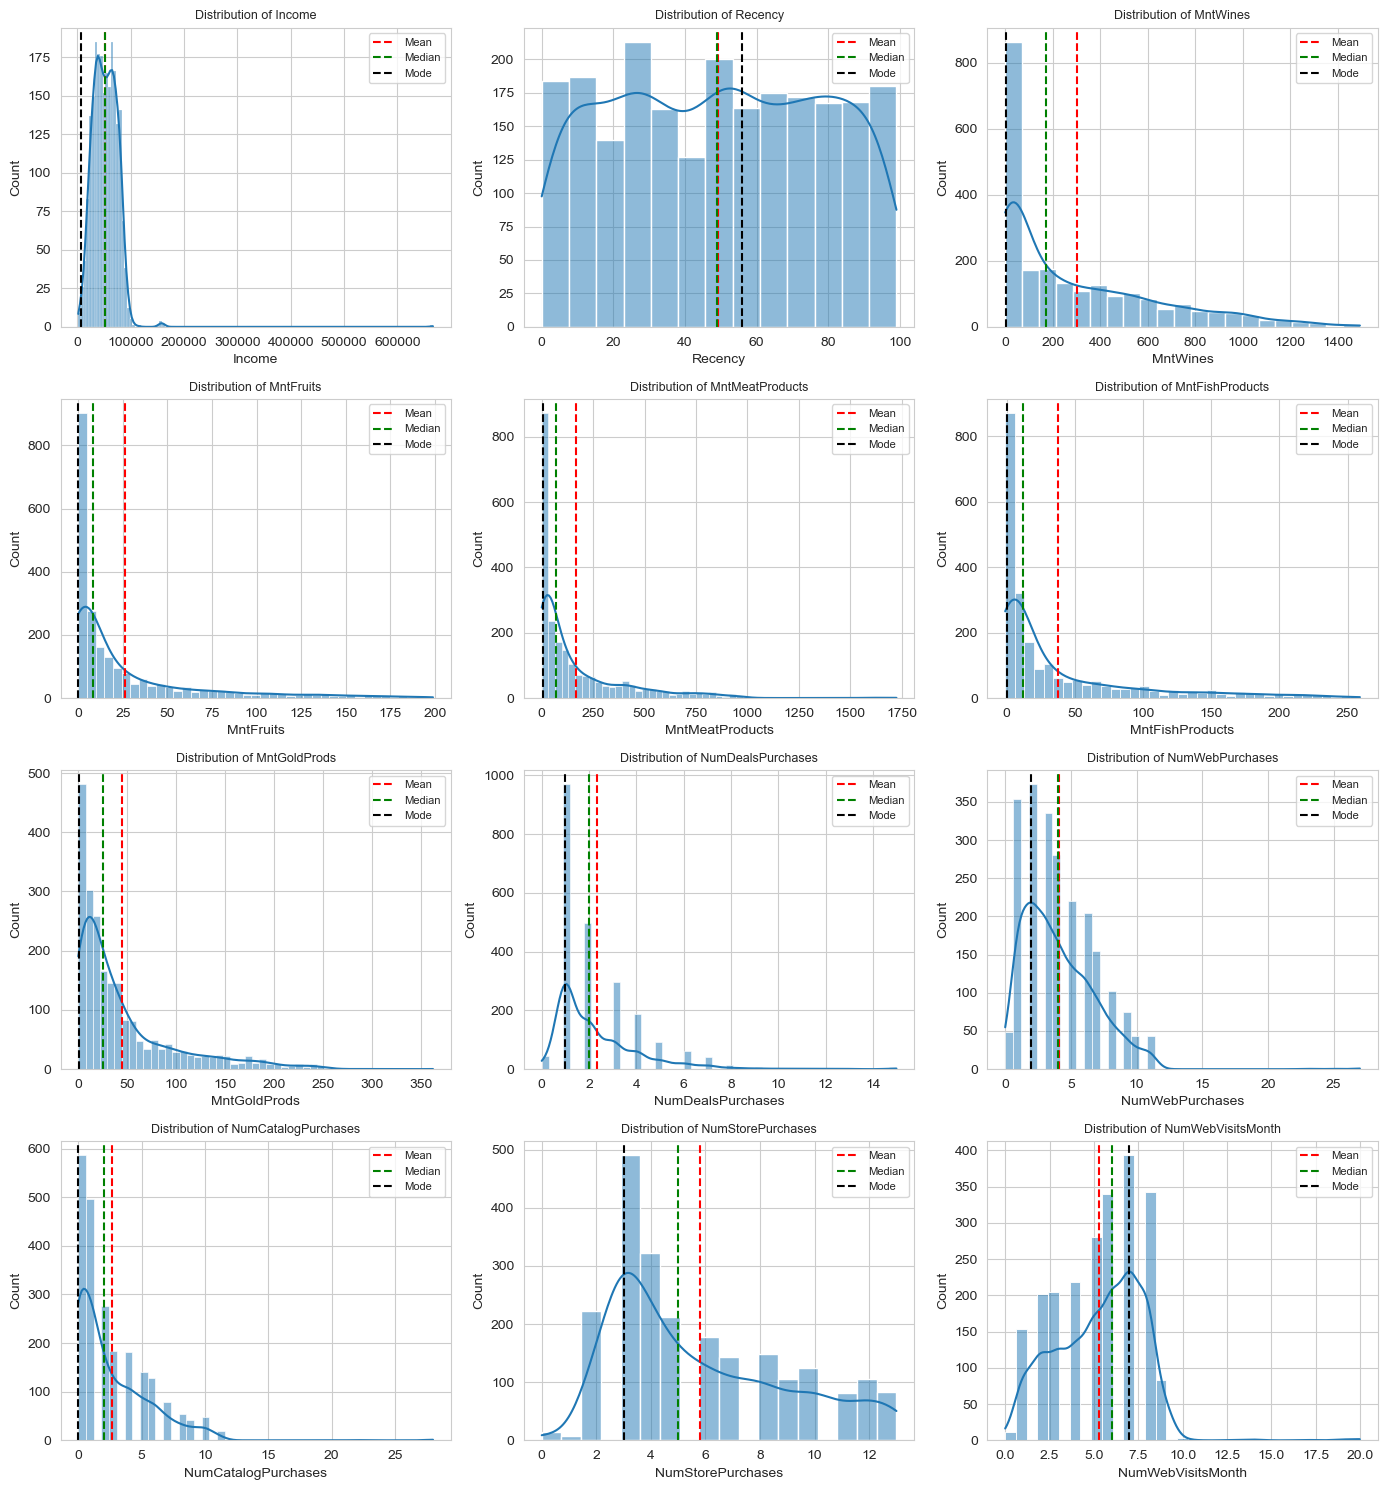

In [14]:
# Define numerical columns 
continuous_cols =  ['Income',
                    'Recency',
                    'MntWines', 
                    'MntFruits', 
                    'MntMeatProducts', 
                    'MntFishProducts', 
                    #'MntSweetProducts', # There are data errors. Not possible to visualize in a right format. Errors will be handled in data preparation phase to prevent data leakage.
                    'MntGoldProds', 
                    'NumDealsPurchases', 
                    'NumWebPurchases', 
                    'NumCatalogPurchases', 
                    'NumStorePurchases', 
                    'NumWebVisitsMonth']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 15))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Iterate over each column and plot the distribution
for i, col in enumerate(ds[continuous_cols]):
    sns.histplot(ds[col], kde=True, ax=axes[i])
    axes[i].axvline(ds[col].mean(), color='r', linestyle='--', label='Mean') # Mean line
    axes[i].axvline(ds[col].median(), color='g', linestyle='--', label='Median') # Median line
    axes[i].axvline(ds[col].mode()[0], color='k', linestyle='--', label='Mode')  # Mode line
    axes[i].legend(fontsize=8)
    axes[i].set_title(f"Distribution of {col}", size=9)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### **Why histogram plot?** 
The purpose of applying histogram plot is to understand the numerical characteristics of the dataset. By providing visual representations of data distributions and central tendency measures (mean, median, mode), it enables to gain insights into the underlying patterns, tendencies and quality of the dataset's numerical variables.

#### **Findings**:
- This plot is an evident that the majority of values shows a right-skewed distribution (example: `MntWines`), where the tail of the distribution extends towards higher values. Addressing extreme values could mitigate the influence of outliers, potentially leading to a more representative depiction of the central tendency of the data. Additionally, the median and mean lines serve as valuable markers for understanding the data distribution. When the mean is greater than the median, and the median is greater than the mode, it indicates a right-skewed distribution, as expressed:

\begin{align}
RightSkewed = \ Mean > Median > Mode
\end{align}

- Observing a smaller disparity between these central tendency indicators suggests a distribution that more closely resembles normality, where the mean, median, and mode are approximately equal. Understanding the distribution of data is crucial for making informed decisions and drawing accurate conclusions from the dataset at hand.

#### **Outliers detection for continuous values**

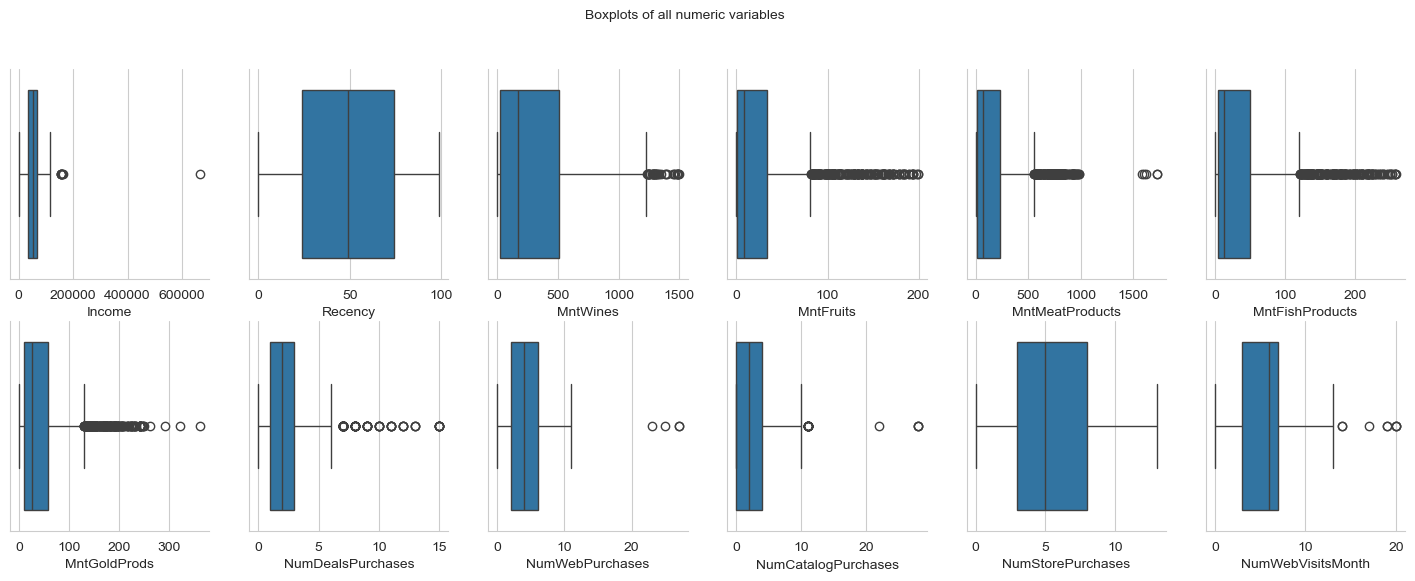

In [15]:
# Code adapted from: Prof. Nuno Antonio, Data Science for Marketing
# Plus, a piece of code is added to print outlier values

# BOXPLOT (ALL NUMERIC VARIABLES)

# Draw
fig, ax = plt.subplots(2, 6, figsize=(18,6))
for var, subplot in zip(ds[continuous_cols], ax.flatten()):
    g = sns.boxplot(data=ds,
                 x=var,
                 ax=subplot)

# Decoration
sns.despine()
plt.rc('axes', labelsize=8)
fig.suptitle("Boxplots of all numeric variables", fontsize=10);

# We may need to filter outliers based on the distribution. Printing outlier values can help the filter exact points.
'''for var in ds[continuous_cols]:
    outliers = ds[var][ds[var] > ds[var].quantile(0.75) + 1.5 * (ds[var].quantile(0.75) - ds[var].quantile(0.25))]
    print(f"Outliers in '{var}':\n{outliers}\n") # Click text editor below (VScode) to check all outlier values''' # To see the outlier values, remove quotes and run the cell. 

plt.show()

# Save to file
# fig.savefig('MultipleBoxplots.svg', bbox_inches="tight")

#### **Why boxplot?** 

- Boxplot helps in the exploration and understanding of outliers within numerical data, enabling us to assess data quality, identify potential issues, and make informed decisions about data preprocessing or analysis strategies.

#### **Findings**: 
- Numerical columns have outliers except `Recency` and `NumStorePurchases` columns.
- For instance, `Income` column has 8 outliers. There is a data point with $666.666 which stands far away from the grouped outliers close the upper fence. Or, `MntMeatProducts` column has 175 outliers and some data points are far away from the grouped data. 

Thanks to this boxplot, we can understand the outliers efficiently and take proper action to build the most efficient model for our dataset.

The determination of quantile ranges to remove outliers is an iterative process that depends on the model results. The main objective is to assign different ranges that effectively filter out outliers while retaining as much data as possible. 

This iterative approach involves adjusting the quantile ranges, evaluating the model results, and refining the ranges until satisfactory outcomes are achieved.

#### **`Categorical` variables vs `Response` variable and the proportions**

#### **Why crosstabulation plots and proportions?**
- The graphs below show the distribution of responses across various levels of education and visually highlight any patterns or disparities. At the same time, the proportions quantify the likelihood of each educational category being present in the dataset and provide insight into their relative importance and relationship to the response variable. In this sense, crosstabulation plots and proportions provide a comprehensive understanding of the relationship between education level and response, helping to identify potential correlations or trends in the data.

#### '`Education`'

Probability of occurence:
Graduation: 50.31%
PhD: 21.70%
Master: 16.52%
2n Cycle: 9.06%
Basic: 2.41%


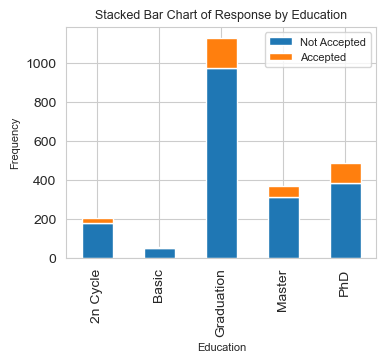

In [16]:
# Create a crosstab and plot it
pd.crosstab(ds.Education,ds['Response']).plot(kind='bar', stacked=True, figsize=(4,3))

# Set the title and y label
plt.title('Stacked Bar Chart of Response by Education', size=9)
plt.ylabel('Frequency')

# Rename the response in legend (0; not accepted, 1; accepted)
plt.legend(["Not Accepted", "Accepted"], fontsize=8)

# Proportions
education_counts = ds['Education'].value_counts()
total_count = education_counts.sum()

# Print 
print("Probability of occurence:")
print('\n'.join([f"{category}: {count/total_count:.2%}" for category, count in education_counts.items()]))

The condition of acceptance depends on education level. Thus, education level can be a good predictor.

- **Grouping education levels** into higher and lower categories for **feature engineering** can be a reasonable approach to reduce noise and simplify the model. By grouping similar education levels together, we can capture the general trend without being overly sensitive to specific categories. 

#### '`Marital_Status`'

Probability of occurrence:
Married: 38.57%
Together: 25.89%
Single: 21.43%
Divorced: 10.36%
Widow: 3.44%
Alone: 0.13%
Absurd: 0.09%
YOLO: 0.09%


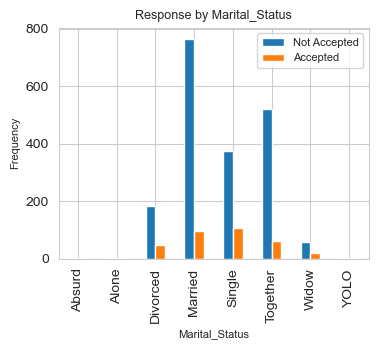

In [17]:
plot_crosstab(ds, 'Marital_Status', 'Response') # Helper function 1

It seems like marital status could be a significant predictor of the response, as there appears to be variation in the counts of responses across different marital statuses. 

- Similar to education levels, we can group `Marital_Status` into broader categories such as **'Married'**, **'Together'**, **Single** *(Single, Divorced, Widow and others('Alone', 'Absurd', and 'YOLO')*. Since 'Alone', 'Absurd', and 'YOLO' has very few values, we can either drop them or assign them into Single. This reduces the number of categories and captures general trends in response rates across different marital statuses.
- Also, as an option, we can convert `Marital_Status` into a binary variable indicating whether an individual is married or not. Sort of grouping will be decided based on the model results.

#### '`Kidhome`'

Probability of occurrence:
0: 57.72%
1: 40.13%
2: 2.14%


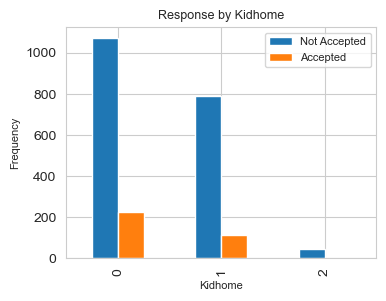

In [18]:
plot_crosstab(ds, 'Kidhome', 'Response') # Helper function 1

#### '`Teenhome`'

Probability of occurrence:
0: 51.70%
1: 45.98%
2: 2.32%


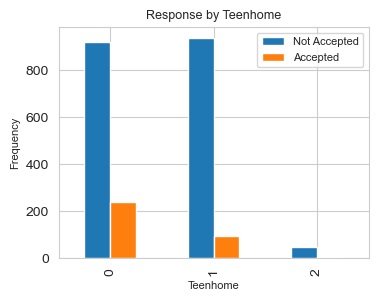

In [19]:
plot_crosstab(ds, 'Teenhome', 'Response') # Helper function 1

Kid home and teen home may also be a potential predictor of the response.

- Both `Kidhome` and `Teenhome` follow the same pattern. Individuals without kid or teenager in the house tend to respond to the campaigns more frequently. 
- For feature engineering, we can create a column named **family size which is the sum of kid home and teen home** or assign binary values if the customer has child or not in the house **(0: no kid or teenager, 1: one or more kid or teenager)**. Method will be chosen based on the model performance.

#### '`AcceptedCmp1`'

Probability of occurrence:
0: 93.57%
1: 6.43%


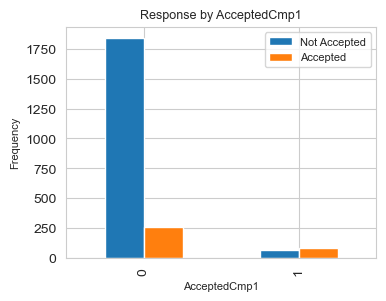

In [20]:
plot_crosstab(ds, 'AcceptedCmp1', 'Response') # Helper function 1

#### '`AcceptedCmp2`'

Probability of occurrence:
0: 98.66%
1: 1.34%


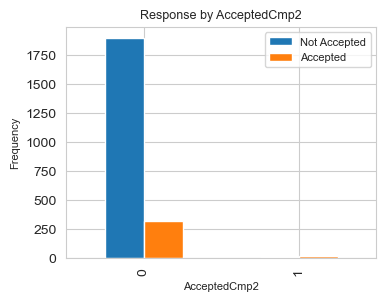

In [21]:
plot_crosstab(ds, 'AcceptedCmp2', 'Response') # Helper function 1

#### '`AcceptedCmp3`'

Probability of occurrence:
0: 92.72%
1: 7.28%


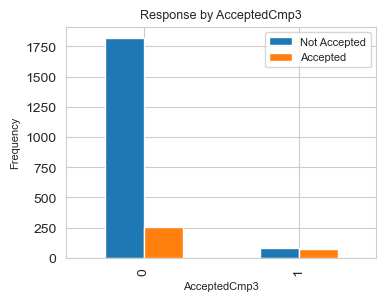

In [22]:
plot_crosstab(ds, 'AcceptedCmp3', 'Response') # Helper function 1

#### '`AcceptedCmp4`'

Probability of occurrence:
0: 92.54%
1: 7.46%


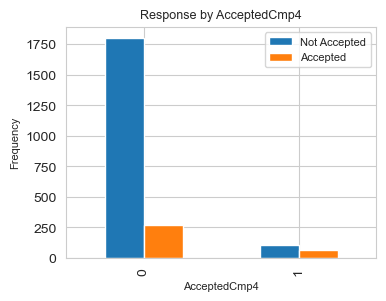

In [23]:
plot_crosstab(ds, 'AcceptedCmp4', 'Response') # Helper function 1

#### '`AcceptedCmp5`'

Probability of occurrence:
0: 92.72%
1: 7.28%


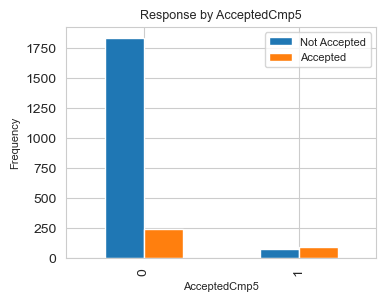

In [24]:
plot_crosstab(ds, 'AcceptedCmp5', 'Response') # Helper function 1

Instead of evaluating the accepted campaigns variables one by one, **summming up the accepted campaigns and create a new variable** can be a good predictor for response variable. Or we can try to **give more weights to recent campaigns**. For example, 0.1 for AcceptedCmp1 or 0.5 for AcceptedCmp5. 

#### '`Complain`'

Probability of occurrence:
0: 99.06%
1: 0.94%


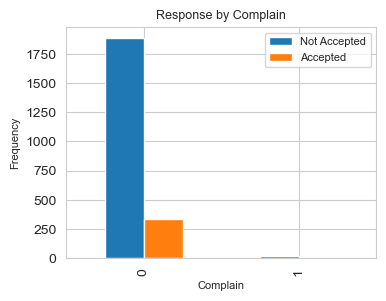

In [25]:
plot_crosstab(ds, 'Complain', 'Response') # Helper function 1

As it seems, Complain might not be a good predictor.

#### **`Continuous` variables vs `Response` variable**

In [26]:
# Group by 'Response' and compute the median for continuous variables
# Since the data is not normally distributed, median is used for more accurate observation and to mitigate impact of skewness
# It is good to remember while mean is calculation, median is location 
median_by_response = ds[continuous_cols + ['Response']].groupby('Response').median()
median_by_response

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Response,,,,,,,,,,,,
0,50150.0,52.0,152.0,7.0,56.0,11.0,21.0,2.0,3.0,1.0,5.0,6.0
1,64090.0,30.0,448.0,21.0,174.5,25.0,39.5,1.0,5.0,4.0,6.0,6.0


Here are some key observations based on the median values of the continuous variables grouped by the response variable:

- `Income`: The median income for customers who didn't respond is 50,150, while for those who responded, it's higher at 64,090. This suggests that higher-income individuals are more likely to respond positively.
- `Recency`: The median recency for customers who responded '0' is 52 days, whereas for those who responded '1', it's lower at 30 days. This implies that more recent customers are more likely to respond positively.
- `Amount Spent on Wines, Fruits, Meat, Fish, and Gold Products:`: Customers who responded '1' tend to spend significantly more on these product categories compared to those who responded '0'. This indicates that higher spenders are more likely to respond positively.
- `Number of Deals Purchased`: Customers who responded '0' have a median of 2 deals purchases, while those who responded '1' have only 1. This suggests that customers who respond positively may not rely heavily on deals or discounts.
- `Number of Web, Catalog, and Store Purchases`: Customers who responded '1' generally have higher median values for these purchase types compared to those who responded '0'. This implies that customers who respond positively engage more in various purchase channels.
- `Web Visits per Month`: Interestingly, both groups have the same median number of web visits per month (6), which indicates that this factor might not strongly influence the response.

Overall, these observations suggest that higher income, more recent, and higher-spending customers across various product categories and purchase channels are more likely to respond positively.

#### '`Recency`'

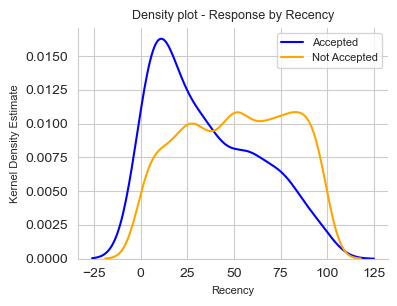

In [27]:
density_plot(ds, 'Recency') # Helper function 2

Since there is clear distinction between the two distributions, it suggests that `Recency` might be a strong predictor.

#### **Why density plots?**

- First, it's a good visualization option to understand the relation between one numerical variable and one categorical variable. 
- Second, density plots are more effective at detecting the distribution shape, because the charts are not impacted by the number of bins, such as in a histogram. A histogram with only four bins would not yield a distribution shape that could be distinguished as well as one with twenty bins. However, that's not a problem with density plots.

#### '`Income`'

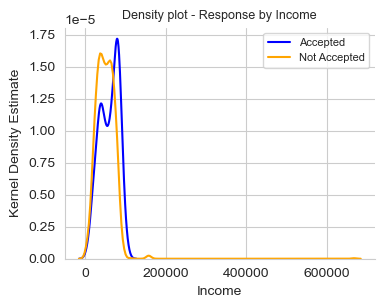

In [28]:
density_plot(ds, 'Income') # Helper function 2

There is a distinction and little overlap between the two distributions, this suggests that `Income` may be a good predictor.

#### '`MntWines`' 

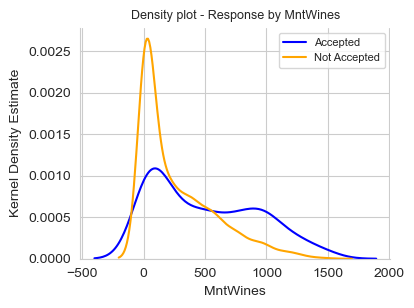

In [29]:
density_plot(ds, 'MntWines') # Helper function 2

#### '`MntFruits`' 

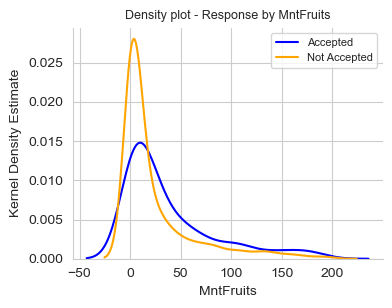

In [30]:
density_plot(ds, 'MntFruits') # Helper function 2

#### '`MntMeatProducts`' 

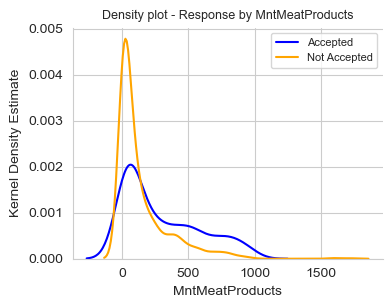

In [31]:
density_plot(ds, 'MntMeatProducts') # Helper function 2

#### '`MntFishProducts`' 

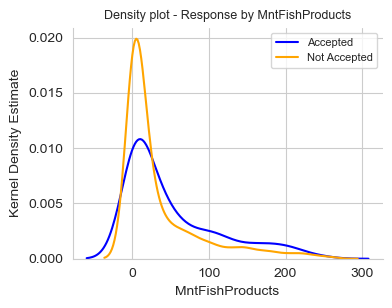

In [32]:
density_plot(ds, 'MntFishProducts') # Helper function 2

#### '`MntGoldProds`' 

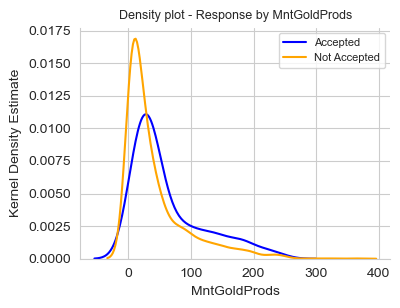

In [33]:
density_plot(ds, 'MntGoldProds') # Helper function 2

Product variables may be good predictors on their own but summing up the amount of products spent and create a new feature may create a strong predictor.

##### **`Year_Birth` and `Dt_Customer` variables vs `Response` variable**

#### Create `Age` variable from `Year_Birth`

In [34]:
# Create a copy of the dataset for analysis
datetime_ds = ds[['Year_Birth', 'Dt_Customer', 'Response']].copy()

In [35]:
# Calculate the current year
current_year = datetime.now().year

# Calculate the age of each individual and create a Age column
datetime_ds['Age'] = current_year - datetime_ds['Year_Birth']

# Confirmation
datetime_ds.head()

,Year_Birth,Dt_Customer,Response,Age
0,1957,2012-09-04,1,67
1,1954,2014-03-08,0,70
2,1965,2013-08-21,0,59
3,1984,2014-02-10,0,40
4,1981,2014-01-19,0,43


Age column is created correctly. 

#### '`Age`'

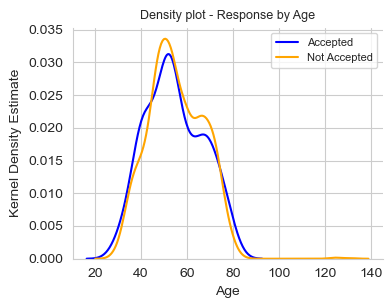

In [36]:
density_plot(datetime_ds, 'Age') # Helper function 2

`Age` variable might not be a good predictor since the patterns are more or less same and overlap. 

- Binning the **age groups based on quantiles** migth lead reduced noise and better interpretability. 

#### Extract `Year`, `Month`, `Day` variable from `Dt_Customer`

In [37]:
# Convert 'Dt_Customer' to datetime format from object
datetime_ds['Dt_Customer'] = pd.to_datetime(datetime_ds['Dt_Customer'])

# Extract enrollment of year, month, and day 
datetime_ds['Year'] = datetime_ds['Dt_Customer'].dt.year
datetime_ds['Month'] = datetime_ds['Dt_Customer'].dt.month
datetime_ds['Day'] = datetime_ds['Dt_Customer'].dt.day

# Confirmation
datetime_ds.head()

,Year_Birth,Dt_Customer,Response,Age,Year,Month,Day
0,1957,2012-09-04,1,67,2012,9,4
1,1954,2014-03-08,0,70,2014,3,8
2,1965,2013-08-21,0,59,2013,8,21
3,1984,2014-02-10,0,40,2014,2,10
4,1981,2014-01-19,0,43,2014,1,19


Year, Month and Day column is created successfully. 

- What we can do here, we can subtract the year of enrollment(`Dt_Customer`) from the current year 2024 and, create a new column that shows the **length of membership** of the customers. 

#### `Year` vs `Response`

Probability of occurrence:
2013: 53.08%
2014: 24.82%
2012: 22.01%
2042: 0.04%
2041: 0.04%


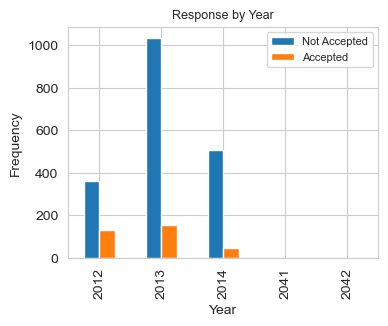

In [38]:
plot_crosstab(datetime_ds, 'Year', 'Response') # Helper function 1

#### `Month` vs `Response`

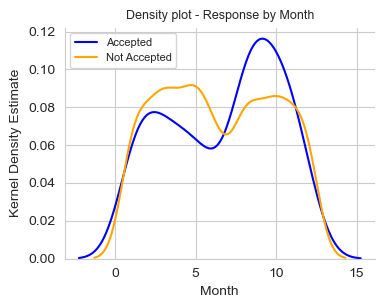

In [39]:
density_plot(datetime_ds, 'Month') # Helper function 2

#### `Day` vs `Response`

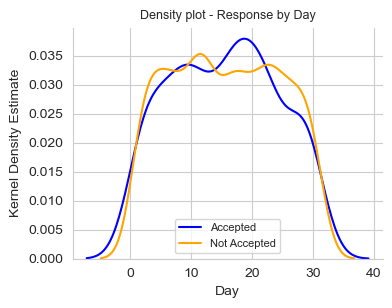

In [40]:
density_plot(datetime_ds, 'Day') # Helper function 2